In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_percentage_error

# Data preprocessing and exploration

In [16]:
df = pd.read_csv('RestaurantVisitors.csv', index_col='date', parse_dates=True)
df

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0
...,...,...,...,...,...,...,...,...
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN


In [17]:
df.index.freq = 'D'
df.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN
2017-05-30,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-31,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN


In [18]:
df1 = df.dropna()
df1.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-18,Tuesday,0,na,30.0,30.0,13.0,18.0,91.0
2017-04-19,Wednesday,0,na,20.0,11.0,30.0,18.0,79.0
2017-04-20,Thursday,0,na,22.0,3.0,19.0,46.0,90.0
2017-04-21,Friday,0,na,38.0,53.0,36.0,38.0,165.0
2017-04-22,Saturday,0,na,97.0,20.0,50.0,59.0,226.0


In [19]:
cols = ['rest1', 'rest2', 'rest3', 'rest4', 'total']
for column in cols:
    df1[column] = df1[column].astype(int)

C:\Users\user\AppData\Local\Temp\ipykernel_4104\2276344416.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[column] = df1[column].astype(int)
C:\Users\user\AppData\Local\Temp\ipykernel_4104\2276344416.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[column] = df1[column].astype(int)
C:\Users\user\AppData\Local\Temp\ipykernel_4104\2276344416.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 478 entries, 2016-01-01 to 2017-04-22
Freq: D
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   weekday       478 non-null    object
 1   holiday       478 non-null    int64 
 2   holiday_name  478 non-null    object
 3   rest1         478 non-null    int32 
 4   rest2         478 non-null    int32 
 5   rest3         478 non-null    int32 
 6   rest4         478 non-null    int32 
 7   total         478 non-null    int32 
dtypes: int32(5), int64(1), object(2)
memory usage: 24.3+ KB


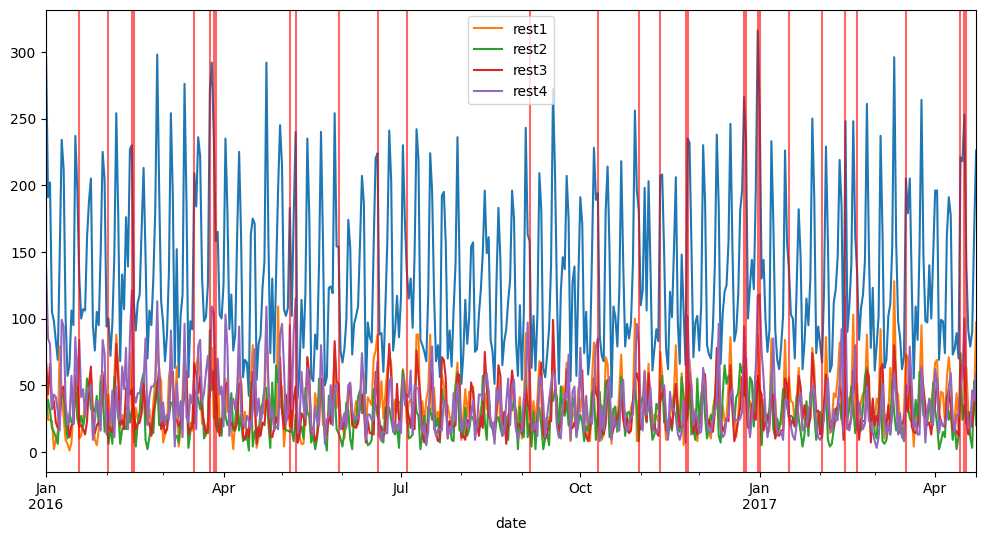

In [21]:
ax = plt.figure(figsize=(12,6))
df1['total'].plot()
for rest in ['rest1', 'rest2', 'rest3', 'rest4']:
    df1[rest].plot(legend=True)
for x in df1.query('holiday==1').index:
    plt.axvline(x, color='r', alpha=0.6)

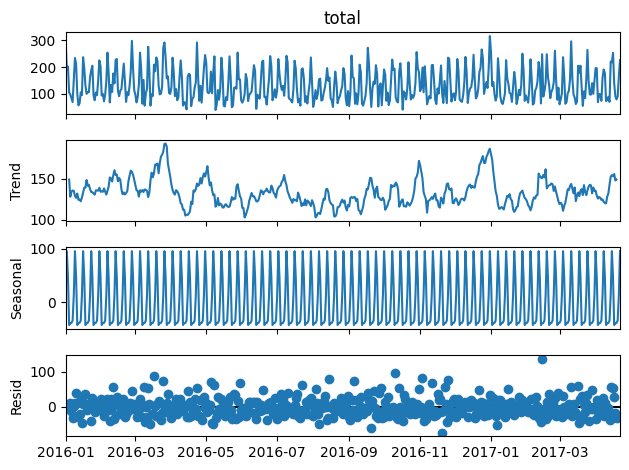

In [22]:
reslt = seasonal_decompose(df1['total'])
reslt.plot();

# Training model

In [24]:
orders = {}
for rest in ['rest1', 'rest2', 'rest3', 'rest4', 'total']:
    model = auto_arima(df1[rest], exog=df1['holiday'], seasonal=True, m=7)
    orders[rest] = (model.order, model.seasonal_order)

c:\Python312\Lib\site-packages\pmdarima\arima\_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(4,0,2)(2,0,1)[7] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\pmdarima\arima\_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "c:\Python312\Lib\site-packages\pmdarima\arima\arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "c:\Python312\Lib\site-packages\pmdarima\arima\arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
                           ^^^^^^^^^^^^^^
  File "c:\Python312\Lib\site-packages\pmdarima\arima\arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
             ^^^^^^^^^^
  File "c:\Python312\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 704, in fit
    mlefit = super(MLEModel, self).fit(start_params, method=method,
             ^^^^^^

In [25]:
orders

{'rest1': ((1, 1, 1), (1, 0, 1, 7)),
 'rest2': ((1, 0, 0), (1, 0, 1, 7)),
 'rest3': ((2, 0, 3), (2, 0, 1, 7)),
 'rest4': ((0, 1, 4), (1, 0, 1, 7)),
 'total': ((0, 0, 0), (1, 0, 1, 7))}

In [26]:
train = df1.iloc[:-12]
test = df1.iloc[-12:]

In [27]:
len(train)

466

In [42]:
models = {}
for rest in ['rest1', 'rest2', 'rest3', 'rest4', 'total']:
    models[rest] = SARIMAX(train[rest], order=orders[rest][0], seasonal_order=orders[rest][1], exog=train['holiday']).fit()

c:\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# Comparison of results

In [44]:
comp = test['total'].to_frame()
comp.rename(columns={'total':'actual'}, inplace=True)
comp

,actual
date,
2017-04-11,77
2017-04-12,89
2017-04-13,70
2017-04-14,221
2017-04-15,218
2017-04-16,253
2017-04-17,140
2017-04-18,91
2017-04-19,79


In [49]:
start = len(train)
end = start + len(test) - 1
comp['total_pred'] = models['total'].predict(start=start, end=end, exog=test['holiday'], dynamic=False)
comp['sum_pred'] = sum([models[f'rest{i}'].predict(start=start, end=end, exog=test['holiday'], dynamic=False) for i in range(1, 5)])

<Axes: xlabel='date'>

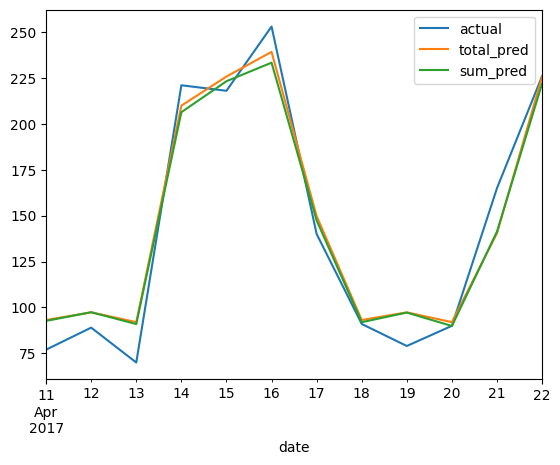

In [50]:
comp.plot()

In [54]:
print(f"MAPE for prediciton from total: {mean_absolute_percentage_error(comp['actual'], comp['total_pred']):.4f}")
print(f"MAPE for prediciton from sum: {mean_absolute_percentage_error(comp['actual'], comp['sum_pred']):.4f}")

MAPE for prediciton from total: 0.1046
MAPE for prediciton from sum: 0.1018
